In [157]:
import numpy as np
import matplotlib.pyplot as plt

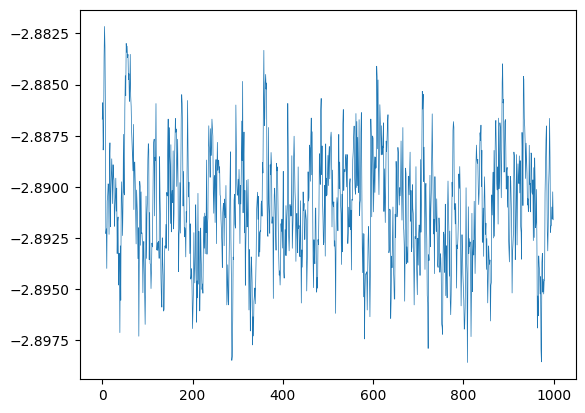

In [158]:
import pandas as pd
df = pd.read_csv('helium_one.csv')
data = df.to_numpy()
E = data[:,0]
#E_var = data[:,1]
plt.plot(E,lw=0.5)

In [159]:
rho_block = np.load(open('rho.npy','rb'))
n_real_block = np.load(open('n(r)_block.npy','rb'))

In [160]:
Nblocks = 1
L = 2 #BOXSIZE
M = rho_block.shape[1] #NUMBER OF POINTS FOR GRID
nconf = 10
W = 0 #Warmup to discard

x = np.linspace(-L,L,M)
y = np.linspace(-L,L,M)
z = np.linspace(-L,L,M)

print('Size estimation in Gb= ', 8*Nblocks*(M**6)/1e9)

Size estimation in Gb=  0.014172488


In [161]:
n = np.average(n_real_block[W:],axis=0)
n_err = np.std(n_real_block[W:],axis=0)

rho = np.average(rho_block[W:],axis=0)
rho_err = np.std(rho_block[W:],axis=0)
n_estim = np.zeros([M,M,M])

for i in range(M):
    for j in range(M):
        for k in range(M):
            n_estim[i,j,k] = rho[i,j,k,i,j,k]

In [162]:
rho.shape

(11, 11, 11, 11, 11, 11)

In [163]:
#rho
#n_estim

In [164]:
max_index = np.argmax(rho)
max_coords = np.unravel_index(max_index, rho.shape)
print('rho is max at', 'x=', x[max_coords[0]],'y=', y[max_coords[1]],'z=', z[max_coords[2]],'x\'=', x[max_coords[3]],'y=\'', y[max_coords[4]],'z\'=', z[max_coords[5]])

rho is max at x= -2.0 y= -0.3999999999999999 z= 2.0 x'= 0.40000000000000036 y=' 0.0 z'= 1.2000000000000002


In [165]:
#LET US DO SOME CHECKS
max_index = np.argmax(n_estim)
max_coords = np.unravel_index(max_index, n_estim.shape)
print('Density is max at', 'x=', x[max_coords[0]],'y=', y[max_coords[1]],'z=', z[max_coords[2]])
print('Integrated density =',np.sum(n_estim), ' Should equal #electrons')

Density is max at x= 0.0 y= 0.0 z= 0.0
Integrated density = 0.12249763220292471  Should equal #electrons


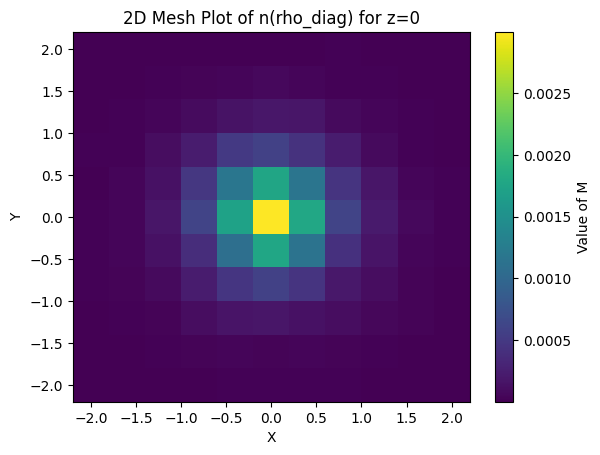

In [166]:
#Density 
slice_n_estim = n_estim[:,:,6]
# Create meshgrid for x and y
X, Y = np.meshgrid(x, y)
plt.figure()
plt.pcolormesh(X, Y, slice_n_estim, shading='auto')
plt.colorbar(label='Value of M')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('2D Mesh Plot of n(rho_diag) for z=0')
plt.show()